In [468]:
import mne
import numpy as np
import matplotlib.pyplot as plt
mne.set_log_level('WARNING')

In [469]:
# add plot inline in the page
%matplotlib inline

In [470]:
raw_fname='Noel R Pre-Deci.bdf'
data=mne.io.read_raw(raw_fname,exclude=('EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8','Status'))
#print(data.info)
#print (data.ch_names)
#data.plot()

In [471]:
##create events and epochs given the raw data
#events = mne.find_events(raw)
#epochs = mne.Epochs(raw, events)

def events_n_epochs(raw_data):
    events = []
    sampling_freq = raw_data.info['sfreq'] #256
    np_data = raw_data.get_data()
    n_timepoints = np_data.shape[-1] #77568
    for i in range(n_timepoints//int(sampling_freq)):
        events.append([i*int(sampling_freq),0,1])
    events = np.array(events)
    epochs = mne.Epochs(raw_data, events)
    return events,epochs
    
events, epochs=events_n_epochs(data)
#epochs.plot()

# compute evoked response and noise covariance,and plot evoked
evoked = epochs.average()
cov = mne.compute_covariance (epochs, tmax=0)
#evoked.plot ()

"""
# print trans
from mne.channels import compute_native_head_t, read_custom_montage
trans = compute_native_head_t(biosemi_montage_data)
print(trans)  # should be mri->head, as the "native" space here is MRI
"""

'\n# print trans\nfrom mne.channels import compute_native_head_t, read_custom_montage\ntrans = compute_native_head_t(biosemi_montage_data)\nprint(trans)  # should be mri->head, as the "native" space here is MRI\n'

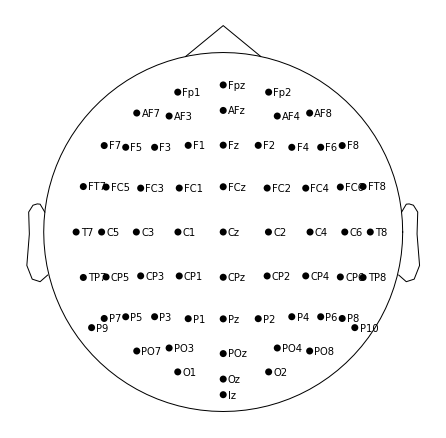

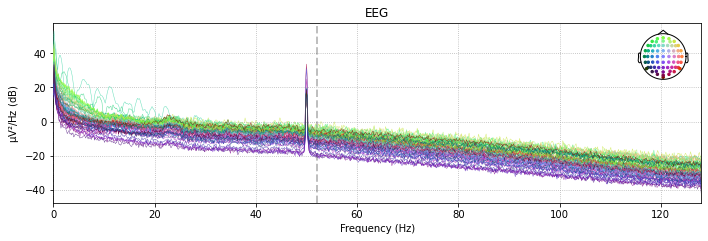

In [480]:
biosemi_montage_data = mne.channels.make_standard_montage('biosemi64') #'standard_1020'
data.set_montage(biosemi_montage_data)
data.plot_sensors(show_names=True)
plt.show()

#plot each channel individually
#color-coding the channels by location

data.plot_psd(picks='eeg') ##visualize the frequency content of continuous data
plt.show()

C:\Users\mvallayi\AppData\Local\Temp\ipykernel_11232\245951455.py:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(data)


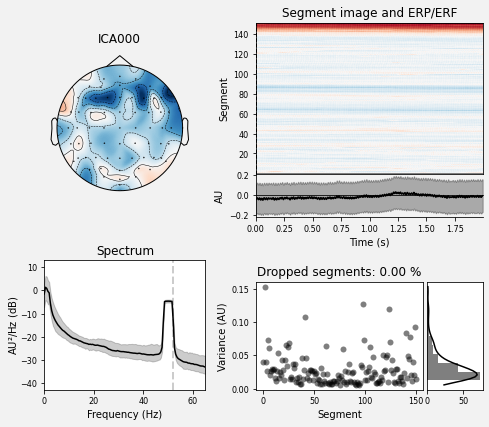

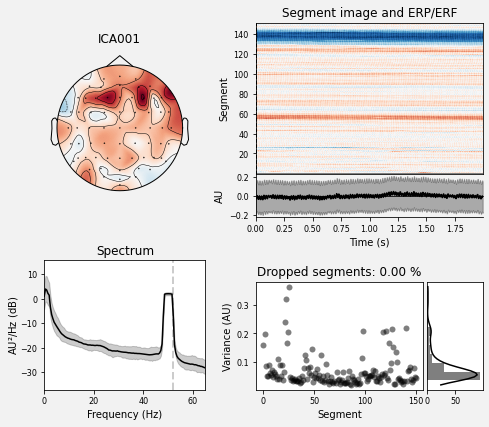

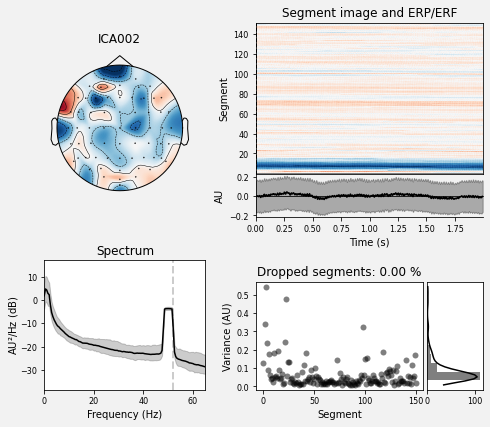

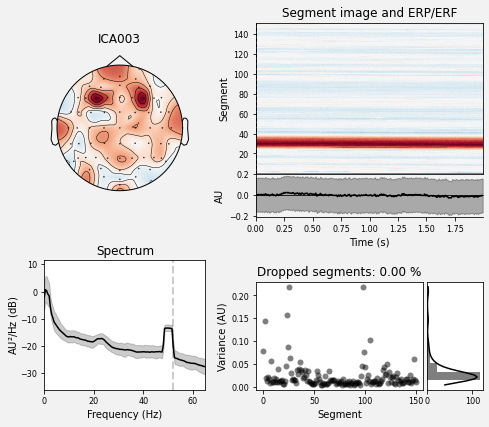

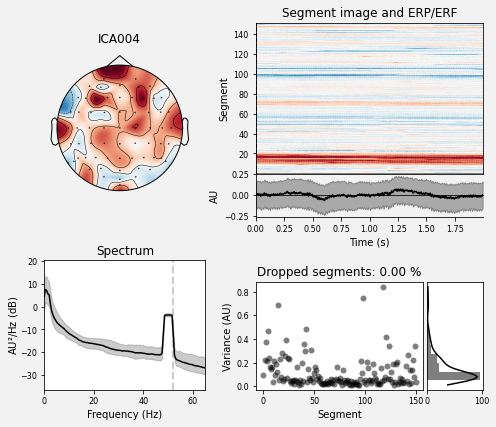

[<Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>]

In [481]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter='auto')
ica.fit(data)
#ica.exclude = [1, 2]  # to display only selected ICAs
ica.plot_properties(data) #(data, picks=ica.exclude)

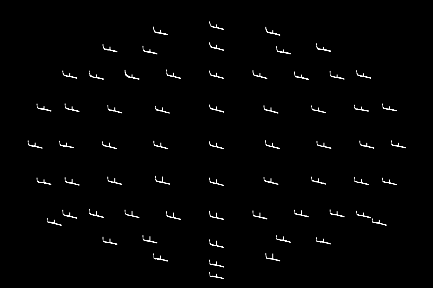

In [482]:
#Power spectral density (PSD) which represents the power distribution of EEG series in the frequency domain
#plot the PSD for every sensor on its own axes, with the axes arranged spatially to correspond to sensor locations in space

data.pick_types(meg=False, eeg=True).plot_psd_topo()
plt.show()

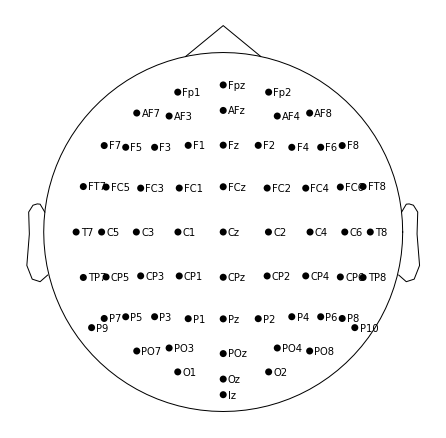

In [483]:
biosemi_montage_epochs = mne.channels.make_standard_montage('biosemi64')
#biosemi_montage.plot()
epochs.set_montage(biosemi_montage_epochs)
epochs.plot_sensors(show_names=True)
plt.show()

C:\Users\mvallayi\AppData\Local\Temp\ipykernel_11232\1283357981.py:2: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  data.set_eeg_reference(projection=True)


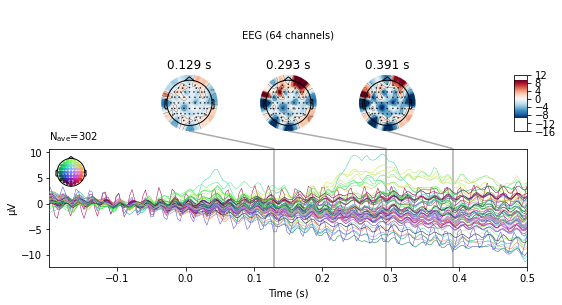

In [484]:
#standard sensor-space operations like make joint plots of evoked data.
data.set_eeg_reference(projection=True)
cov = mne.compute_covariance(epochs, tmax=0.)
evoked = epochs['1'].average()  # trigger 1 in auditory/left
evoked.plot_joint()
plt.show()

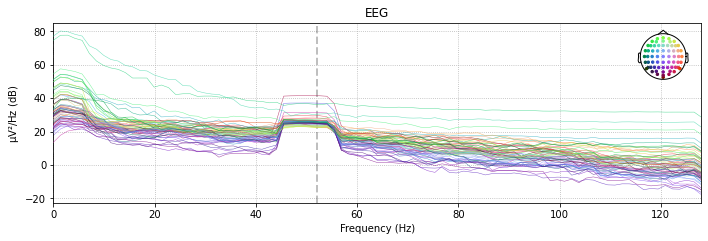

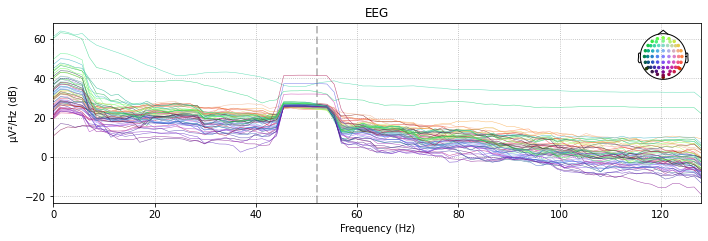

In [485]:
## Plot the power spectral density /epoch
for i in range(1,3):
    epochs['1'][i].plot_psd(picks='eeg')
    plt.show()

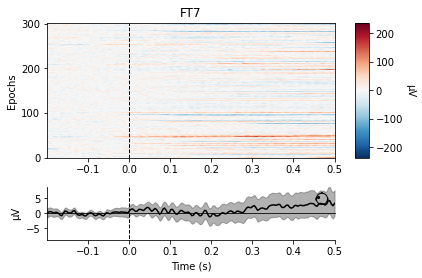

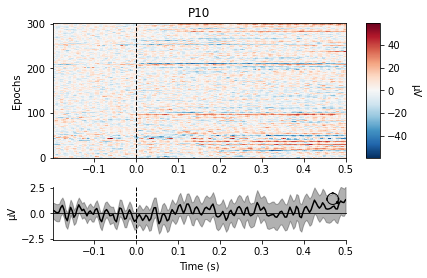

[<Figure size 432x288 with 4 Axes>]

In [496]:
## Visualize Selected Channels

epochs['1'].plot_image(picks=[7])
epochs['1'].plot_image(picks=[60])

# Plotting Epochs as an image map

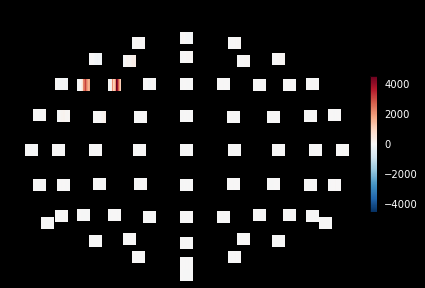

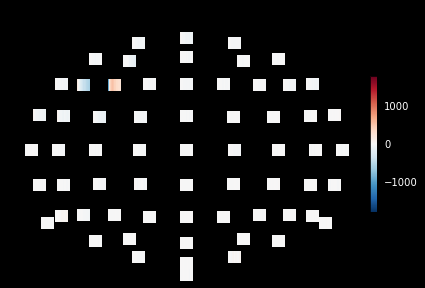

In [239]:
# visualize epochs using the plot_topo_image method 
for i in range(1,3):
    epochs['1'][i].plot_topo_image()
    plt.show()

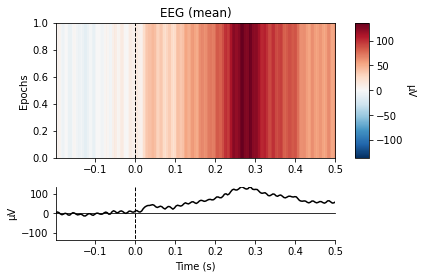

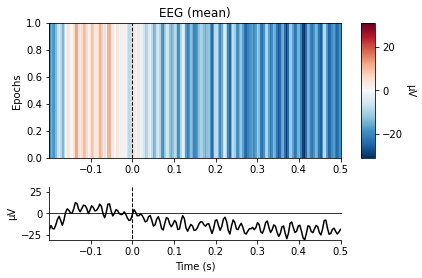

In [240]:
# visualize epochs using the plot_image method 
for i in range(1,3):
    epochs['1'][i].plot_image(picks='eeg', combine='mean') 

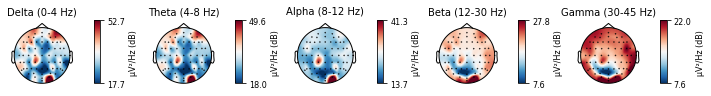

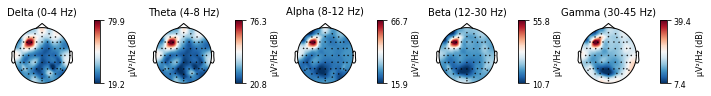

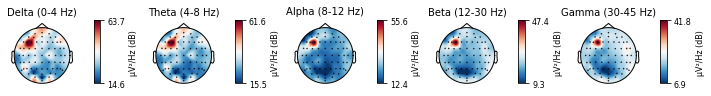

Time taken-- 2.519895553588867


In [467]:
import time
start = time. time()
for i in range(3): #len(epochs)
    epochs['1'][i].plot_psd_topomap(ch_type='eeg',cmap='RdBu_r',outlines='head',show=False)
    plt.show() 

end = time. time()
time=end-start
print ('Time taken--', time)

In [419]:
## helmet

import pyvista,pyvistaqt

fig = mne.viz.plot_alignment(data.info, dig=False,surfaces=[], meg=['helmet', 'sensors'], coord_frame='meg')
mne.viz.set_3d_view(fig, azimuth=50, elevation=90, distance=0.5) #, eeg=False,


## sphere head

#trans = mne.transforms.Transform('head', 'mri', np.eye(4))
#sphere = mne.make_sphere_model(r0=(0., 0., 0.), head_radius=0.10)

sphere = mne.make_sphere_model(r0='auto', head_radius='auto', info=data.info)
fig = mne.viz.plot_alignment( data.info, dig=True, 
                             surfaces=['head'], eeg=['original', 'projected'], #eeg=True, # "head", "outer_skin", "head-dense" or "seghead"
                             coord_frame='auto',trans='fsaverage',bem=sphere, show_axes=True)
mne.viz.set_3d_view(fig, azimuth=50, elevation=90, distance=0.5)



In [402]:
from mne.channels.montage import get_builtin_montages
from mne.datasets import fetch_fsaverage
from mne.viz import set_3d_title, set_3d_view
from mne_connectivity import spectral_connectivity_epochs
from mne_connectivity.viz import plot_sensors_connectivity

## without sphere
for current_montage in get_builtin_montages():
    montage = mne.channels.make_standard_montage(current_montage)
    info = mne.create_info(
        ch_names=montage.ch_names, sfreq=100., ch_types='eeg')
    info.set_montage(montage)
    sphere = mne.make_sphere_model(r0='auto', head_radius='auto', info=info)
    fig = mne.viz.plot_alignment(
        # Plot options
        show_axes=True, dig=False, surfaces='auto',
        bem=sphere, info=info)
    set_3d_view(figure=fig, azimuth=135, elevation=80)
    set_3d_title(figure=fig, title=current_montage)
    

## with sphere
for current_montage in get_builtin_montages():
    montage = mne.channels.make_standard_montage(current_montage)
    info = mne.create_info(
        ch_names=montage.ch_names, sfreq=100., ch_types='eeg')
    info.set_montage(montage)
    sphere = mne.make_sphere_model(r0='auto', head_radius='auto', info=info)
    fig = mne.viz.plot_alignment(
        # Plot options
        show_axes=True, dig='fiducials', surfaces='head',
        bem=sphere, info=info,trans='fsaverage')
    set_3d_view(figure=fig, azimuth=135, elevation=80)
    set_3d_title(figure=fig, title=current_montage)

C:\Users\mvallayi\AppData\Local\Temp\ipykernel_11232\847782173.py:12: RuntimeWarning: Only 10 head digitization points of the specified kinds ("eeg", "extra",), fitting may be inaccurate
  sphere = mne.make_sphere_model(r0='auto', head_radius='auto', info=info)
C:\Users\mvallayi\AppData\Local\Temp\ipykernel_11232\847782173.py:12: RuntimeWarning: (X, Y) fit (-2.5, 43.5) more than 20 mm from head frame origin
  sphere = mne.make_sphere_model(r0='auto', head_radius='auto', info=info)
C:\Users\mvallayi\AppData\Local\Temp\ipykernel_11232\847782173.py:12: RuntimeWarning: (X, Y) fit (-2.5, 33.4) more than 20 mm from head frame origin
  sphere = mne.make_sphere_model(r0='auto', head_radius='auto', info=info)
